In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
def f(x, b):
    return 5*x - b

def f2(x, b):
    return 1/10*x**2 - b
x1 = []
for i in range(100):
    x1.append(random.uniform(-100,100))
    
x2 = []
for i in range(100):
    error = random.uniform(-300,300)
    x2.append(f2(x1[i],-250) + error)
y1 = [0]*100

x3 = []
for i in range(100):
    x3.append(random.uniform(-100,100))
    
x4 = []
for i in range(100):
    error = random.uniform(-300,300)
    x4.append(f(x3[i],150) + error)
y2 = [1]*100

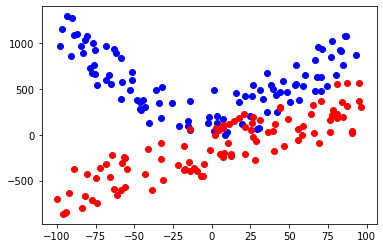

In [2]:
plt.scatter(x1, x2, c="blue")
plt.scatter(x3, x4, c="red")
plt.show()

In [3]:
x_1 = np.array(x1+x3).reshape(-1,1)
x_2 = np.array(x2+x4).reshape(-1,1)
x = np.concatenate((x_1, x_2), axis = 1)

y = np.array(y1 + y2)

place = np.arange(200)
np.random.shuffle(place)
x, y = x[place], y[place]


In [4]:
class log_model():
    def __init__(self):
        self.w1 = random.random()
        self.w2 = random.random()
        self.b = random.random()
        
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def predict(self, x1, x2):
        z = self.w1*x1 + self.w2*x2 + self.b
        a = self.sigmoid(z)
        return a

In [5]:
def train(X, Y, model):
    dw1 = 0.0
    dw2 = 0.0
    db = 0.0
    cost = 0.0
    m = len(X)
    for (x1, x2), y in zip(X, Y):
        pred = model.predict(x1, x2)
#         if y == 1:
#             cost -= np.log(pred)
#         else:
#             cost -= np.log(1-pred)
        cost -= y*np.log(pred) + (1-y)*np.log(1-pred)
        dw1 += (pred-y)*x1
        dw2 += (pred-y)*x2
        db += (pred-y)
    cost /= m
    model.w1 -= lr*(dw1/m)
    model.w2 -= lr*(dw2/m)
    model.b -= lr*(db/m)
    return cost
    

In [6]:
model = log_model()

In [7]:
epochs = 20000
lr = 0.00002

for epoch in range(epochs):
    cost = train(x, y, model)
    if epoch%2000 == 0:
        print(cost)
print(str(model.w1) + ' ' + str(model.w2) + ' ' + str(model.b))
print('train_finished')
    

C:\Users\GEONHO~1\AppData\Local\Temp/ipykernel_25676/3009091568.py:13: RuntimeWarning: divide by zero encountered in log
  cost -= y*np.log(pred) + (1-y)*np.log(1-pred)
C:\Users\GEONHO~1\AppData\Local\Temp/ipykernel_25676/3009091568.py:13: RuntimeWarning: invalid value encountered in multiply
  cost -= y*np.log(pred) + (1-y)*np.log(1-pred)
C:\Users\GEONHO~1\AppData\Local\Temp/ipykernel_25676/2666670204.py:8: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


nan
0.40951361496073363
0.32489091037899875
0.259667563651542
0.22093512359048595
0.2068560203071873
0.2041389193263853
0.2037640386901672
0.2036574122837256
0.20357445919848136
0.0622684456692699 -0.013081846352377966 0.6732086568612925
train_finished


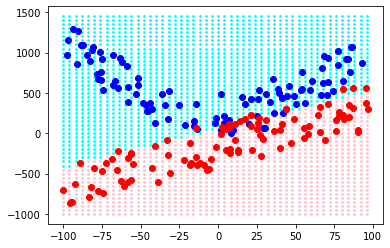

In [8]:
x22 = []
xmin = -100
xmax = 100
stepx = int((xmax-xmin)/50)
ymin = -1000
ymax = 1500
stepy = int((ymax-ymin)/50)
for i in range(xmin, xmax, stepx):
    for j in range(ymin, ymax, stepy):
        x22.append([i,j])
x22 = np.array(x22)

pred1 = []
for i, j in x22:
    pred1.append(model.predict(i, j))

pred1 = np.array(pred1)
pred1 = np.where(pred1<0.5, 0, 1)
plt.scatter(x22[:,0][pred1==0], x22[:,1][pred1==0], s=3, c = 'cyan')
plt.scatter(x22[:,0][pred1==1], x22[:,1][pred1==1], s=3, c = 'pink')
plt.scatter(x1, x2, c="blue")
plt.scatter(x3, x4, c="red")
plt.show()

In [9]:
print(model.predict(0,-500))

0.9992644320761706
